In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
curve = cv2.imread('images/curve.jpg')

# roi selection
# gets top left coordinates, and width/height of roi image
x1, y1, width, height = cv2.selectROI('curve roi', curve)
curve_roi = curve[y1 : (y1 + height),
                  x1 : (x1 + width)]
cv2.destroyAllWindows()
cv2.waitKey(0)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


-1

Text(0.5, 1.0, 'Dilation 3x3')

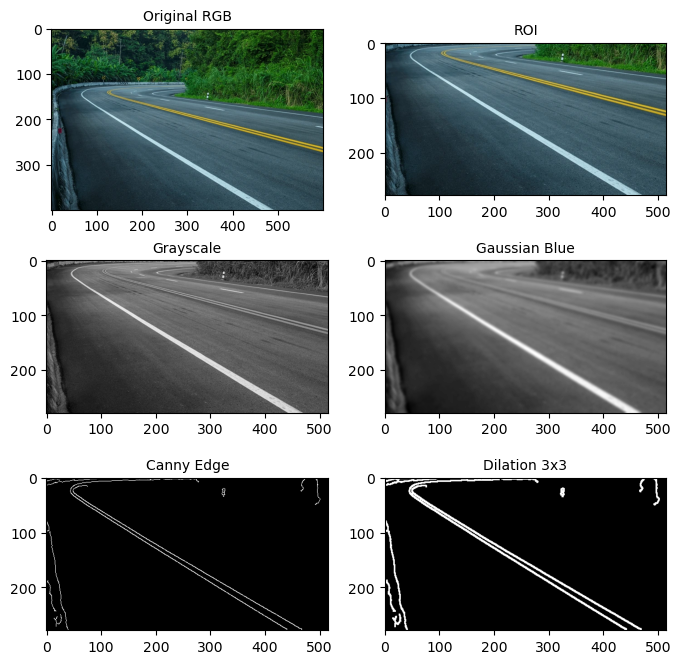

In [4]:
plt.figure(figsize=(8,8))
curve_rgb = cv2.cvtColor(curve, cv2.COLOR_BGR2RGB)
plt.subplot(3,2,1)
plt.imshow(curve_rgb)
plt.title('Original RGB', fontsize=10)

curve_roi = cv2.cvtColor(curve_roi, cv2.COLOR_BGR2RGB)
plt.subplot(3,2,2)
plt.imshow(curve_roi)
plt.title('ROI', fontsize=10)

curve_gray = cv2.cvtColor(curve_roi, cv2.COLOR_BGR2GRAY)
plt.subplot(3,2,3)
plt.imshow(curve_gray, cmap='grey')
plt.title('Grayscale', fontsize=10)

lower=50
upper=150
curve_gaussian = cv2.GaussianBlur(curve_gray, (11,11), 0)
plt.subplot(3,2,4)
plt.imshow(curve_gaussian, cmap='grey')
plt.title('Gaussian Blue', fontsize=10)

# higher upper --> gets rid of noise from trees, too much details
lower=20
upper=100
curve_canny = cv2.Canny(curve_gaussian, lower, upper)
plt.subplot(3,2,5)
plt.imshow(curve_canny, cmap='grey')
plt.title('Canny Edge', fontsize=10)

kernel = np.ones((3,3), np.uint8)
threshold = 20
curve_dilation = cv2.dilate(curve_canny, kernel, threshold)
plt.subplot(3,2,6)
plt.imshow(curve_dilation, cmap='grey')
plt.title('Dilation 3x3', fontsize=10)




Text(0.5, 1.0, 'Curved Road Line Detection')

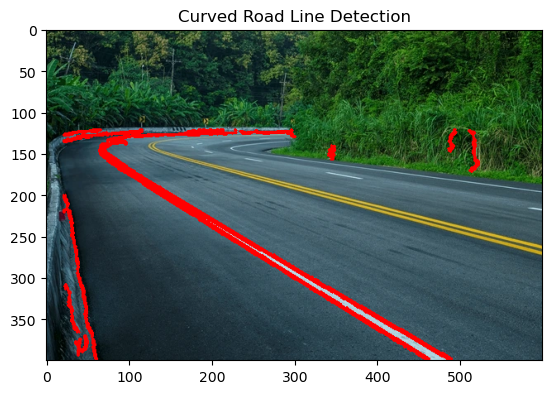

In [5]:
lines = cv2.HoughLinesP(curve_dilation, 1, np.pi/180, 10, minLineLength=0)
curve_rgb_copy = np.copy(curve_rgb)

for line in lines:
  roi_x1, roi_y1, roi_x2, roi_y2 = line[0]

  og_x1 = x1 + roi_x1
  og_y1 = y1 + roi_y1
  og_x2 = x1 + roi_x2
  og_y2 = y1 + roi_y2

  cv2.line(curve_rgb_copy,(og_x1, og_y1),(og_x2, og_y2), (255,0,0), 2)
 
plt.imshow(curve_rgb_copy)
plt.title('Curved Road Line Detection')